### 단축키 사용법
- 실행 단축키 :
  - ctrl + enter : 실행 후 커서가 그대로 위치
  - shift + enter : 실행 후 커서가 아래 셀로 이동
- 마크다운 전환
  - ctrl + m + m
- 아래 셀 추가
  - ctrl + m + b
- 위 셀 추가
  - ctrl + m + a
- 자동완성 : ctrl + space

###  딥러닝 맛보기
 - 딥러닝이란?
   - 인간의 신경말을 모방하여 학습하고 예측하는 기술
   - 대량의 데이터에서 복잡한 패턴, 규칙을 찾아내는 능력이 뛰어남
   - 머신러닝에 비해 조금 더 유연한 사고
   - 인간의 뉴런 == 딥러닝 선형모델
   - 주로 영상처리, 음성처리, 이미지 분야에 적용됨

- 딥러닝 프레임워크
  - tensorflow
    - 구글이 만든 딥러닝을 위한 라이브러리
  - keras
    - tensorflow 위에 동작하는 라이브러리 -> 사용자 친화적 라이브러리
    - tensorflow 기반 사용자 인터페이스 API

In [ ]:
import tensorflow as tf
print(tf.__version__)
# 설치버전 확인하는 이유 > 프로젝트시 딥러닝 모델을 가져다 쓸 때, 버전이 맞지 않으면 오류 발생하기 때문

2.18.0


In [ ]:
# 파일관리 시 리눅스 명령어 사용
!pwd

/content


In [ ]:
# 파일의 경로 변경
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


In [ ]:
!pwd

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


### 머신러닝, 딥러닝 모델 비교
- 동일한 데이터를 가지고 머신러닝, 딥러닝 실습을 통해 결과를 비교
- 공부시간에 따른 수학 성적을 예측하는 회귀모델

### 머신러닝 모델과 딥러닝 모델의 차이점
- 머신러닝
  - 모델생성(완성된 객체 사용) -> 모델학습 -> 모델예측 -> 모델평가
  - 완제품 로봇 - 팔정도만 움직일 수 있음 (하이퍼파라미터)
<br><br>
- 딥러닝
  - 모델생성(모델을 직접 구성) -> 모델학습 -> 모델예측 -> 모델평가
  - 조립식 로봇 - 우리가 구성하고자하는 모양으로 구성
  - 다양한 결과를 만들어낼 수 있음



In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 자동완성 : ctrl + space
data = pd.read_csv('./data/student-mat.csv', delimiter=';')
data.head()
# 정답레이블 : G3(3학년 성적) -> 학생 성적을 맞추는 모델링 -> 회귀
# 2개의 입력데이터를 사용 : studytime, freetime

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- 데이터 분리
  - 문제, 정답
    - 문제 데이터(X)
    - 답 데이터(y)
  - 학습용, 평가용
    - 학습용(X_train, y_train)
    - 평가용(X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = data[['studytime','freetime']]
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# 1. 문제와 정답의 수가 일치, 2. 훈련용,테스트용 입력특성의 수 일치 확인

((276, 2), (119, 2), (276,), (119,))

- 머신러닝 모델링

In [ ]:
# 모델 객체 생성
li_reg = LinearRegression()
# 모델 학습
li_reg.fit(X_train, y_train)
# 모델 예측
pred = li_reg.predict(X_test)
# 모델 평가
mean_squared_error(y_test, pred)

21.72675646101634

### 신경망 모델 구성하기(딥러닝 모델링)
- 순서
1. 신경망 모델 구조 설계
  - 뼈대 생성
  - 입력층
  - 중간층, 은닉층
  - 출력층
2. 학습방법 및 평가방법 설정(분류, 회귀)
3. 모델 학습 및 학습결과 시각화
4. 모델 예측 및 평가

In [ ]:
# 신경망 설꼐 도구 불러오기
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense
# InputLayer : 입력층 설계시 사용
# Dense : 밀집도 -> 중간층, 출력층

In [ ]:
y_train.shape  #==> 1차원 데이터

(276,)

In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층 설계
model.add(InputLayer(input_shape=(2,))) # 입력특성의 개수/  studytime, freetime / 지금은 1차원 데이터이기 때문에 ,가 필요

# 중간층, 은닉층 -> 학습의 성능을 설정
# model.add(Dense(units=10, activation='sigmoid')) # 한 층에 10개의 퍼셉트론 설계/ 1
# model.add(Dense(units=10, activation='sigmoid')) 2
# model.add(Dense(units=10, activation='sigmoid')) 3
# model.add(Dense(units=10, activation='sigmoid')) 4층
model.add(Dense(units=10, activation='sigmoid')) #--> 10개의 퍼셉트론 5층 설계
# units 높을수록 학습능력 향상되나 시간 오래걸리고 과대적합 가능성
# activation (활성화 함수): 인간처럼 생각할 수 있도록 도와주는 역할

# 출력층 -> 출력받고자 하는 데이터에 형태를 지정 -> 회귀
model.add(Dense(units=1))  # G3(3학년 성적) 1개 출력

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


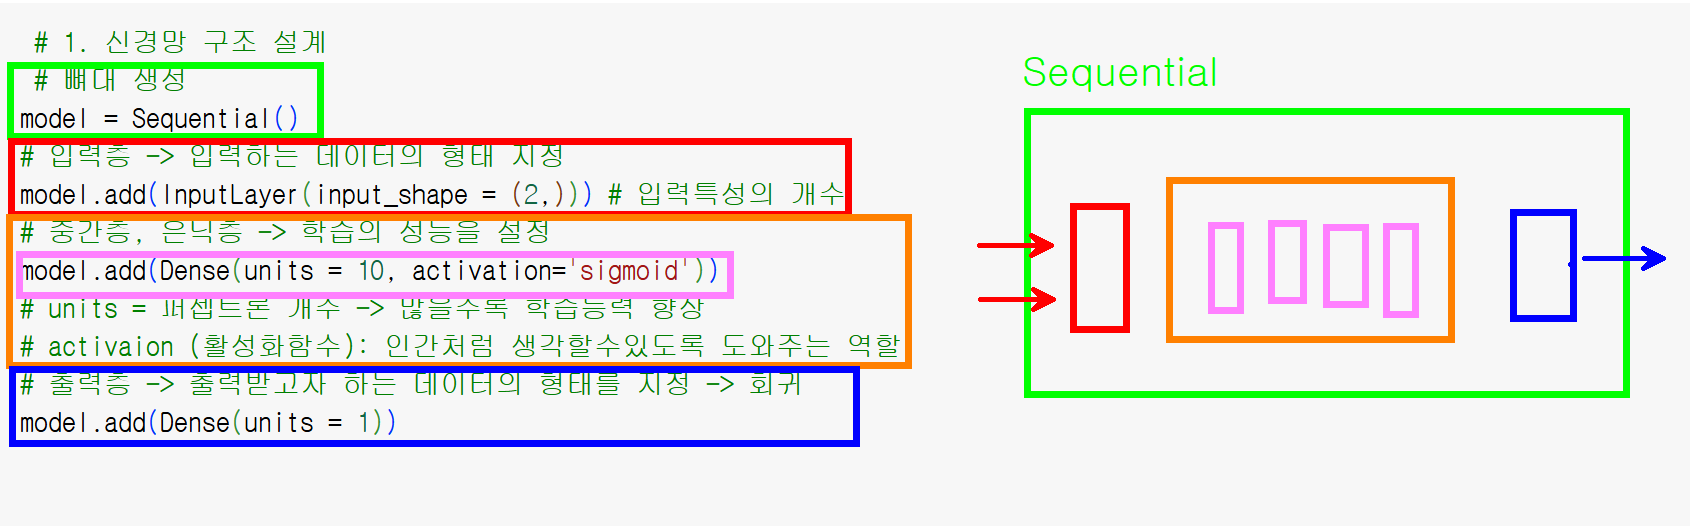

In [ ]:
# 2. 학습방법 및 평가방법 설정
model.compile(loss ='mean_squared_error', optimizer='SGD', metrics=['mse'])  # SGD: 확률적 경사하강법
# loss : 오차 -> 모델일 얼마나 잘못되었는지에 대한 지표
# optimizer: 최적화 함수 -> 오차를 줄여나가는 방법 -> 경사하강법
# metrics : 평가지표

In [ ]:
# 3. 신경망 모델 학습
his = model.fit(X_train,y_train, validation_split=0.2, epochs=20)  # validation 검증 데이터, epochs:학습횟수

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 96.8405 - mse: 96.8405 - val_loss: 44.5007 - val_mse: 44.5007
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 35.9391 - mse: 35.9391 - val_loss: 24.3706 - val_mse: 24.3706
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.7292 - mse: 21.7292 - val_loss: 21.1690 - val_mse: 21.1690
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.4850 - mse: 21.4850 - val_loss: 20.8391 - val_mse: 20.8391
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19.3157 - mse: 19.3157 - val_loss: 20.6893 - val_mse: 20.6893
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.8114 - mse: 20.8114 - val_loss: 20.9180 - val_mse: 20.9180
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.2844 - mse: 20.2844 - val_loss: 20.8133 - val_mse: 20.8133
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.8295 - mse: 17.8295 - val_loss: 20.9976 - val_mse: 20.9976
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [ ]:
his.history

{'loss': [81.99967193603516,
  29.56783103942871,
  21.446271896362305,
  20.7850341796875,
  20.666778564453125,
  20.657039642333984,
  20.714174270629883,
  20.664276123046875,
  20.639421463012695,
  20.60531997680664,
  20.644357681274414,
  20.545976638793945,
  20.507768630981445,
  20.488862991333008,
  20.527997970581055,
  20.5633602142334,
  20.403728485107422,
  20.421966552734375,
  20.3896541595459,
  20.401477813720703],
 'mse': [81.99967193603516,
  29.56783103942871,
  21.446271896362305,
  20.7850341796875,
  20.666778564453125,
  20.657039642333984,
  20.714174270629883,
  20.664276123046875,
  20.639421463012695,
  20.60531997680664,
  20.644357681274414,
  20.545976638793945,
  20.507768630981445,
  20.488862991333008,
  20.527997970581055,
  20.5633602142334,
  20.403728485107422,
  20.421966552734375,
  20.3896541595459,
  20.401477813720703],
 'val_loss': [44.50070571899414,
  24.37060546875,
  21.16904067993164,
  20.839101791381836,
  20.68929100036621,
  20.9

In [ ]:
his.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

- val_loss : 새로 들어온 데이터 , loss : train 데이터

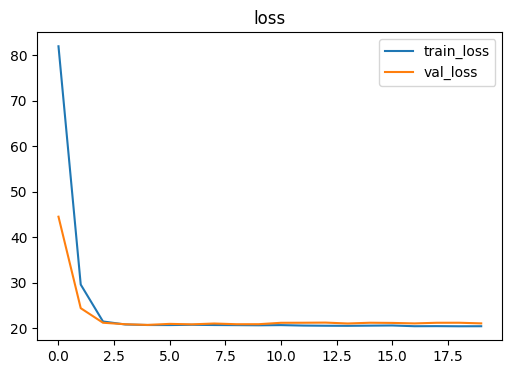

In [ ]:
# 학습과정 결과 시각화
plt.figure(figsize=(6,4))
plt.plot(his.history['loss'], label='train_loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.legend() # legend : 레이블
plt.title('loss')
plt.show()

- 학습횟수가 증가할 수록 loss값이 떨어지는 것을 확인
- val_loss 값이 증가한다면 과대적합 의심
- 현재는 일정한 감소 및 유지 -> 일반화

In [ ]:
# y 가 loss - 여기에서는 mse -> 작을수록 좋음
# mse가 상승했을 때 -> 과대적합
# x축은 epoch

In [ ]:
# 예측
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[10.161674 ],
       [10.5640135],
       [10.099533 ],
       [10.5640135],
       [10.5640135],
       [ 9.698678 ],
       [ 9.698678 ],
       [10.590446 ],
       [10.099533 ],
       [10.41691  ],
       [10.60901  ],
       [10.5640135],
       [10.161674 ],
       [10.60901  ],
       [10.962879 ],
       [ 9.962664 ],
       [10.983801 ],
       [11.201197 ],
       [10.60901  ],
       [10.983801 ],
       [ 9.962664 ],
       [ 9.698678 ],
       [10.5640135],
       [10.5640135],
       [10.863461 ],
       [10.099533 ],
       [10.60901  ],
       [10.5640135],
       [10.60901  ],
       [11.19791  ],
       [10.099533 ],
       [ 9.962664 ],
       [10.590446 ],
       [10.60901  ],
       [10.099533 ],
       [10.5640135],
       [10.962879 ],
       [10.863461 ],
       [10.863461 ],
       [10.60901  ],
       [10.099533 ],
       [11.119054 ],
       [10.41691  ],
       [10.60901  ],
       [10.962879 ],
       [10.590446 ],
       [11.19791  ],
       [ 9.96

In [ ]:
# 평가
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1979 - mse: 22.1979 


[21.529932022094727, 21.529932022094727]

- mse : 약 21.5

#### 결과
- 머신러닝 모델 : 21.72675646101634
- 딥러닝 모델 : 21.529932022094727
<br><br>
코드 효율을 생각한다면 머신러닝 모델이 사용에 더 적합하다고 할 수 있음

### 스스로 입력특성 4개 선택
- 신경망 모델 설계, 학습, 평가
  - 중간층 1개만 쌓기(units=10)
  - 학습 횟수 20

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
X = data[['age','studytime','freetime','absences']]
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
model = Sequential()
model.add(InputLayer(input_shape=(4,)))
model.add(Dense(units=10, activation='sigmoid'))
model.add(Dense(units=1))
model.compile(loss ='mse', optimizer='SGD', metrics=['mse'])
his = model.fit(X_train,y_train, validation_split=0.2, epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 96.4126 - mse: 96.4126 - val_loss: 31.4791 - val_mse: 31.4791
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30.1948 - mse: 30.1948 - val_loss: 20.0439 - val_mse: 20.0439
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.9577 - mse: 21.9577 - val_loss: 18.4881 - val_mse: 18.4881
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.9519 - mse: 19.9519 - val_loss: 18.2733 - val_mse: 18.2733
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.4169 - mse: 19.4169 - val_loss: 18.1227 - val_mse: 18.1227
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.3230 - mse: 19.3230 - val_loss: 18.2831 - val_mse: 18.2831
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.7845 - mse: 21.7845 - val_loss: 18.0785 - val_mse: 18.0785
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.2087 - mse: 19.2087 - val_loss: 18.0771 - val_mse: 18.0771
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20

In [ ]:
his.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

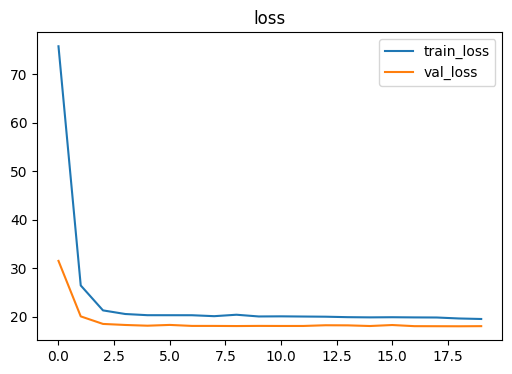

In [ ]:
# 학습과정 결과 시각화
plt.figure(figsize=(6,4))
plt.plot(his.history['loss'], label='train_loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.legend() # legend : 레이블
plt.title('loss')
plt.show()

In [ ]:
model.predict(X_test)
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.3136 - mse: 22.3136


[21.76382827758789, 21.76382827758789]

- mse 약 21.76

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 96.4342 - mse: 96.4342 - val_loss: 39.0436 - val_mse: 39.0436
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 28.7840 - mse: 28.7840 - val_loss: 22.6918 - val_mse: 22.6918
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.6542 - mse: 20.6542 - val_loss: 19.4198 - val_mse: 19.4198
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.7843 - mse: 16.7843 - val_loss: 18.0697 - val_mse: 18.0697
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.1282 - mse: 18.1282 - val_loss: 16.4089 - val_mse: 16.4089
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.3100 - mse: 16.3100 - val_loss: 15.1568 - val_mse: 15.1568
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.1750 - mse: 16.1750 - val_loss: 15.5161 - val_mse: 15.5161
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.1234 - mse: 16.1234 - val_loss: 14.0922 - val_mse: 14.0922
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14

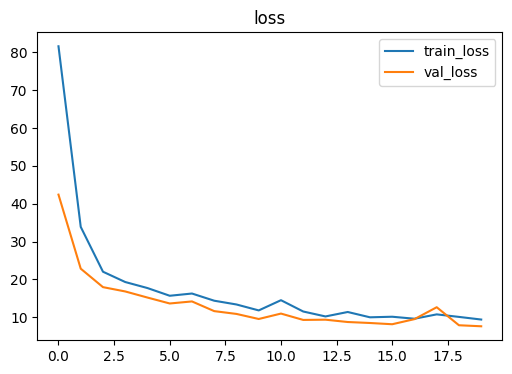

In [51]:
X = data[['studytime','G1','G2','health']]
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)
model2 = Sequential()
model2.add(InputLayer(input_shape=(4,)))
model2.add(Dense(units=10, activation='sigmoid'))
model2.add(Dense(units=1))
model2.compile(loss ='mse', optimizer='SGD', metrics=['mse'])
his2 = model2.fit(X_train,y_train, validation_split=0.2, epochs=20)
print(model2.evaluate(X_test,y_test))

plt.figure(figsize=(6,4))
plt.plot(his.history['loss'], label='train_loss')
plt.plot(his.history['val_loss'], label='val_loss')
plt.legend() # legend : 레이블
plt.title('loss')
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 87.0974 - mse: 87.0974 - val_loss: 31.8115 - val_mse: 31.8115
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 26.5780 - mse: 26.5780 - val_loss: 16.4789 - val_mse: 16.4789
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.3193 - mse: 14.3193 - val_loss: 13.4502 - val_mse: 13.4502
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 13.1173 - mse: 13.1173 - val_loss: 11.3911 - val_mse: 11.3911
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.9269 - mse: 12.9269 - val_loss: 10.5533 - val_mse: 10.5533
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.6949 - mse: 10.6949 - val_loss: 9.0492 - val_mse: 9.0492
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.1550 - mse: 12.1550 - val_loss: 8.4010 - val_mse: 8.4010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.3060 - mse: 9.3060 - val_loss: 9.3432 - val_mse: 9.3432
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.1606 -

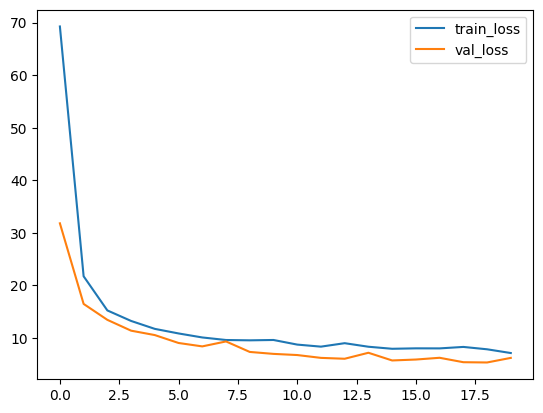

In [52]:
# int 형 데이터만 가져와서 학습

X = data[["studytime", "freetime", "failures", "G2"]]
y = data["G3"]

X_train, X_test, y_train, y_test=train_test_split(X,y,train_size = 0.7, random_state= 5)

model = Sequential()

model.add(InputLayer(input_shape = (4,)))
model.add(Dense(units =10, activation = "sigmoid"))

model.add(Dense(units=1))


model.compile(loss = "mean_squared_error",
              optimizer = "SGD",
              metrics = ['mse'])
model_edu = model.fit(X_train, y_train, validation_split=0.2, epochs=20)  # 검증데이터 20%, 20 번 반복(w,b 값 갱신)

print(model.evaluate(X_test, y_test))

plt.plot(model_edu.history["loss"], label = "train_loss")
plt.plot(model_edu.history["val_loss"],label ="val_loss")
plt.legend()  # 범례
plt.show()